<span style="font-size:x-large;">Lab 6</span>

# Let it Rain!

<div>
<img src="rainfall-deciles.png" width="700">
</div>

Source: [120 Years of Australian Rainfall](http://www.bom.gov.au/climate/history/rainfall/), Bureau of Meteorology

As an 'oasis' on the bottom corner of a desert, the Western Australian southwest region, including Perth, is more at risk from  any decline in rainfall than many other aspects of climate change.

The 2019 rainfall map (shown above) paints the worst picture for Australian rainfall in 100 years. 2020 does not look as bad. This year to year variation is why its important to consider long term trends.

In this lab, we will examine raw data from the Bureau of Meteorology going back over half a century, focussing specifically on the Perth region, and see if there are any trends we can observe for ourselves.

While we have access to a relatively small period of time geologically speaking, its a very important period of time from the perspective of man-made climate change. It will be interesting to see whether, even in such a short period of time, we can observe any trends.


## Data Acquisition and Inspection

The Australian Government's **Bureau of Meteorology (BOM)** provides a wealth of climate data through its **Climate Data Online** service.

* Find the _monthly observations rainfall data_ for Perth.

You should see a number of weather stations in the Perth area. Notice that when you select a station, a graph is provided that indicates over what timespan data from that station is available, and how complete the data is.

> _Q: Which station has the longest record of data available?_
>
> _Which station has a complete record for the longest period?_



* Download the data for the Midland and Perth Airport stations to your computer.

Data is typically accompanied by a 'README' file or similar, explaining what is in the files.

* Read the `..Note.txt` file for one of the datasets. Look out in particular for:
  * information on the data fields contained in the files
  * information on missing data
  * information on quality of the data

As you read the file, start to think about what you might need to do when inspecting and cleaning the data.

- Inspect the data to see if it matches what you expect to see from the Note.


You will have noticed from the Note file there are two formats for the monthly data. We will use the 6 column format (with the quality flags) for this lab.

* Upload the data to CoCalc, and set up constants to point to the data.

The files should not be more than 50KB. Check this by viewing the directory listing in CoCalc.

- Import `numpy` and `pyplot`.

### The `csv` library

So far we have parsed csv files ourselves. As this is a common task, a package called `csv` is provided in the python standard library.

Look up the documentation for the csv module in the latest version of the Python Standard Library documentation.

* Import the `csv` package, and use a csv `reader` to read the Perth Airport data into a list of lists.

*Hint: the reader is an iterable, so it can be used with `list()` to create a list of lists.*

How many lines of data are there?


In [1]:
import numpy as np
import matplotlib as plt
import csv


airport_data=[]
with open('IDCJAC0001_009021_Data1.csv','r') as csv_file:
	airport= csv.reader(csv_file)

	for count,line in enumerate (airport):
		airport_data.append(line)


print (airport_data,len(airport_data))


[['Product code', 'Station number', 'Year', 'Month', 'Monthly Precipitation Total (millimetres)', 'Quality'], ['IDCJAC0001', '009021', '1944', '05', '110.6', 'Y'], ['IDCJAC0001', '009021', '1944', '06', '77.5', 'Y'], ['IDCJAC0001', '009021', '1944', '07', '177.4', 'Y'], ['IDCJAC0001', '009021', '1944', '08', '108.3', 'Y'], ['IDCJAC0001', '009021', '1944', '09', '53.1', 'Y'], ['IDCJAC0001', '009021', '1944', '10', '16.9', 'Y'], ['IDCJAC0001', '009021', '1944', '11', '27.0', 'Y'], ['IDCJAC0001', '009021', '1944', '12', '45.3', 'Y'], ['IDCJAC0001', '009021', '1945', '01', '1.3', 'Y'], ['IDCJAC0001', '009021', '1945', '02', '3.6', 'Y'], ['IDCJAC0001', '009021', '1945', '03', '16.8', 'Y'], ['IDCJAC0001', '009021', '1945', '04', '7.2', 'Y'], ['IDCJAC0001', '009021', '1945', '05', '89.1', 'Y'], ['IDCJAC0001', '009021', '1945', '06', '424.1', 'Y'], ['IDCJAC0001', '009021', '1945', '07', '117.7', 'Y'], ['IDCJAC0001', '009021', '1945', '08', '264.7', 'Y'], ['IDCJAC0001', '009021', '1945', '09', 

## Data Cleaning and Conversion


Lets start by examining the data.

- Use a list comprehension to select and count the rows in which the rainfall field is either empty or does not start with a numerical character.
- Use a list comprehension to count how many rows have the flag 'Y'.
- Use a list comprehension to count how many rows have the flag 'N'.
- Use a list comprehension to count how many rows have the flag '' (empty).

_Hint: By now you would have viewed the video on list comprehensions on the Live Unit Outline. Use a list comprehension to create a list of rows and `len()` to give the count._

- Print the percentage of rows that have a 'Y' flag to 3 significant figures (1 decimal place).

- Use a list comprehension (one line) to extract a list `valid` that contains all the rows which have rainfall field that is nonempty and starts with a numerical character, and in which the flag is in 'YN'.

In [2]:
def isnum(x): #checks if input element is a float
	try:
		f=float(x)
		return True
	except ValueError:
		pass

In [3]:
#select and count the rows in which the rainfall field is either empty or does not start with a numerical character.
wrong_rainfall= [line for line in airport_data if isnum(line[4])== True] 
print(len(wrong_rainfall))

y_flag= len( [line for line in airport_data if line[-1]== 'Y']) #count how many rows have the flag 'Y'.
print(y_flag)

n_flag=    len([line for line in airport_data if line[-1]== 'N']) #count how many rows have the flag 'N'.
print(n_flag)

no_flag= len([line for line in airport_data if line[-1]=='']) #Use a list comprehension to count how many rows have the flag '' (empty).
print(no_flag)



928
916
12
0


In [4]:
me=['2.0','']

o=[i for count, i in enumerate(me)if isfloat(i)==True]
print(o)

NameError: name 'isfloat' is not defined

In [0]:
clean_data=[line for count,line in enumerate(airport_data) if isnum(line[4])== True and line[-1]!='']

y_data=[ line for line in clean_data if line[-1]=='Y'] #filters data with 'y' in it to a separate list
y_perc= (len(y_data)/len(clean_data))*100



#print(clean_data)
print( '\n the percentage of rows that have a "Y" flag =' + str( round(y_perc,1)) +'%')

#### numpy `datetime64`

The python ecosystem contains a (confusing) number modules for dealing with dates and times (again a product of the way it evolved), including the modules `datetime`, `time` and `calendar` (we will see another later).

numpy also has its own [datetime type](https://numpy.org/doc/stable/reference/arrays.datetime.html), called `datetime64` (indicating its size, and distinguishing it from the `datetime` module).

numpy's datetime has a fixed-size representation (a 64-bit integer) which allows it to be used efficiently in standard numpy arrays. This means however it has a precision limit, and there is a trade-off (albeit very large) between the 'bigness' of timespan that can be represented, and the 'smallness' of the time interval that can be represented.

To make it most useful, numpy lets you choose the time units it represents, from *attoseconds* (for particle physicists?) through to *years* (for geologists?). This is explained in the section [Datetime Units](https://numpy.org/doc/stable/reference/arrays.datetime.html?highlight=datetime#datetime-units) which provides a table showing the timespan that can be used for each unit size.

The limits are far more than we will ever need for our time-series data, but understanding why it works this way makes it easy to understand the reason for including date or time units.

To see how `datetime64` can be used as an array type, and the power of doing so, try the following. (Each should only take one line.)

  * Assign today's date to a variable `today` (use the format YYYY-MM-DD).
  * Print the `dtype` to check that you are using 'Day' as the date units.
  * Use `arange` to create an array of dates from January 1st this year to December 31st.
  * Print the last day of the array to check you used the right bounds.
  * How many days will there be this year?
  * What day of the year is it today?
  * How many days to go this year?
  * Print the date in a week's time.

*Hint: For the last questions use arithmetic directly on the datetime data. You do not need to convert it.*

Since our data is monthly, we'll use *months* (`'M'`) as the unit from here on.

In [0]:
import numpy as np

today= np.datetime64('2021-10-02') #today's date

dates=np.arange(np.datetime64('2021-01-01'),np.datetime64('2021-12-31')) #makes a list with dates from the given range

no_days=len(dates)
which_day= np.where(dates==today) #finds position of given date in dates array


print(which_day[0][0]) #prints what day of the year today is
print(np.dtype(today))
print(no_days)


#### Data types

In order to plot the rainfall data, we would like to have an array of months, and a corresponding array of rainfalls for those months. (By a month, we mean a particular month in time, such as January 1957, not the concept of 'all Januaries'. We refer to this as a _timestamp_, albeit a fairly low resolution one.)

We have already extracted all the lines of data that have numerical data in the rainfall field and a valid flag.

Now we want to get out the relevant fields.

> _Q: What data types would you use?_

#### Pre-allocating arrays

We'll use a loop to extract the data directly into arrays (we won't use an 'accumulator' list). As we saw in the lectures, to do this efficiently, we need to pre-allocate arrays of the right size.

* Using numpy's `full` method, define arrays for:
  * months, with type `datetime64[M]`
  * rain, with type `float`
  * flags, with type `boolean` (True for 'Y', False for 'N')

* Using `enumerate`, write a loop to inspect each line in your list of cleaned data, and store the correct date, rainfall, and flag in the three arrays.

In [0]:
month= np.full([len(clean_data)],0,dtype= 'datetime64[M]')
rainfall=np.full([len(clean_data)],0,dtype= 'float')
quality= np.full([len(clean_data)],0,dtype= 'bool')

print(month)
#print(rainfall)
#print(quality)

#### Putting it all together [Checked answer, 1 mark]


Complete the function `raindata(filename)` which:
* uses a csv reader to read the data from the file *filename* into a list of lists
* uses a list comprehension to extract the lines in which the rainfall measurement is nonempty and begins with a numeric character, and which have a Y or N flag.
* allocates space in arrays for `months`, `rain`, and `flags` with types `datetime64[D]`, `float`, and `boolean` respectively
* assigns the data to the arrays (with boolean True representing the flag 'Y', and False representing 'N')
* returns a triple `(months, rain, flags)` containing the three arrays


In [5]:
import numpy as np
import matplotlib as plt
import csv

In [6]:
def raindata(filename):

	with open(filename,'r') as csv_file:
		airport= csv.reader(csv_file)
		airport_data=[line for line in airport]

	clean_data=[line for count,line in enumerate(airport_data) if isnum(line[4])== True and line[-1]!='']

#created arrays for month, rainfall and quality
	months= np.full([len(clean_data)],0,dtype= 'datetime64[M]')
	rain=np.full([len(clean_data)],0,dtype= float)
	flags= np.full([len(clean_data)],0,dtype= 'bool')

#assigns data from clean_data into the respective arrays
	for count,row in enumerate(clean_data): 
		rain[count]= row[4]
		months[count]=np.datetime64(row[2]+'-'+row[3])
		if row[-1]=='Y':
			flags[count]=True
		elif row[-1]=='N':
			flags[count]= False

	return (month,rain,flags)






#raindata('IDCJAC0001_009021_Data1.csv')

In [7]:
def isnum(x): #checks if input element is a float, is used for the raindata() function
	try:
		f=float(x)
		return True
	except ValueError:
		pass

In [8]:
def raindata(filename):

#opens file ad assigns data into a list of lists
	with open(filename,'r') as csv_file:
		airport= csv.reader(csv_file)
		airport_data=[line for line in airport]

#cleans data from airport_data by checking if rainfall column has floats and is not empty and the flags column is not empty
	clean_data=[line for count,line in enumerate(airport_data) if isnum(line[4])== True and line[-1]!='']

#created arrays for month, rainfall and quality
	months= np.full([len(clean_data)],0,dtype= 'datetime64[M]')
	rain=np.full([len(clean_data)],0,dtype= float)
	flags= np.full([len(clean_data)],0,dtype= 'bool')

#assigns data from clean_data into the respective arrays
	for count,row in enumerate(clean_data): 
		rain[count]= row[4]
		months[count]=np.datetime64(row[2]+'-'+row[3])
		if row[-1]=='Y':
			flags[count]=True
		elif row[-1]=='N':
			flags[count]= False

	return (months,rain,flags)



In [9]:
from nose.tools import assert_equal, assert_almost_equal
AIRPORT_DATA = "IDCJAC0001_009021_Data1.csv"
(months, rain, flags) = raindata(AIRPORT_DATA)
assert_equal(len(months), len(rain))
assert_almost_equal((months[0], rain[0], flags[0]), (np.datetime64('1944-05'), 110.6, True))
assert_almost_equal((months[3], rain[3], flags[3]), (np.datetime64('1944-08'), 108.3, True))
print("So far so good. But always do your own testing!")


So far so good. But always do your own testing!


## Data Visualisation and Analysis

* Create a scatter plot of the amount of rain against months for the Perth Airport data.

Your plot might look something like this:

<div>
<img src="airport2021.png" width="700">
</div>

Can you see any trends yet in the data?

There may be a lot of overlap between the sample points, especially at the bottom. One way to see better what is happening is to set the opaqueness (or, conversely, transparency) or *alpha* value.

* Check the documentation for `plt.scatter()`, set the alpha value to 0.5, and replot.


['1944-05' '1944-06' '1944-07' '1944-08' '1944-09' '1944-10' '1944-11'
 '1944-12' '1945-01' '1945-02' '1945-03' '1945-04' '1945-05' '1945-06'
 '1945-07' '1945-08' '1945-09' '1945-10' '1945-11' '1945-12' '1946-01'
 '1946-02' '1946-03' '1946-04' '1946-05' '1946-06' '1946-07' '1946-08'
 '1946-09' '1946-10' '1946-11' '1946-12' '1947-01' '1947-02' '1947-03'
 '1947-04' '1947-05' '1947-06' '1947-07' '1947-08' '1947-09' '1947-10'
 '1947-11' '1947-12' '1948-01' '1948-02' '1948-03' '1948-04' '1948-05'
 '1948-06' '1948-07' '1948-08' '1948-09' '1948-10' '1948-11' '1948-12'
 '1949-01' '1949-02' '1949-03' '1949-04' '1949-05' '1949-06' '1949-07'
 '1949-08' '1949-09' '1949-10' '1949-11' '1949-12' '1950-01' '1950-02'
 '1950-03' '1950-04' '1950-05' '1950-06' '1950-07' '1950-08' '1950-09'
 '1950-10' '1950-11' '1950-12' '1951-01' '1951-02' '1951-03' '1951-04'
 '1951-05' '1951-06' '1951-07' '1951-08' '1951-09' '1951-10' '1951-11'
 '1951-12' '1952-01' '1952-02' '1952-03' '1952-04' '1952-05' '1952-06'
 '1952

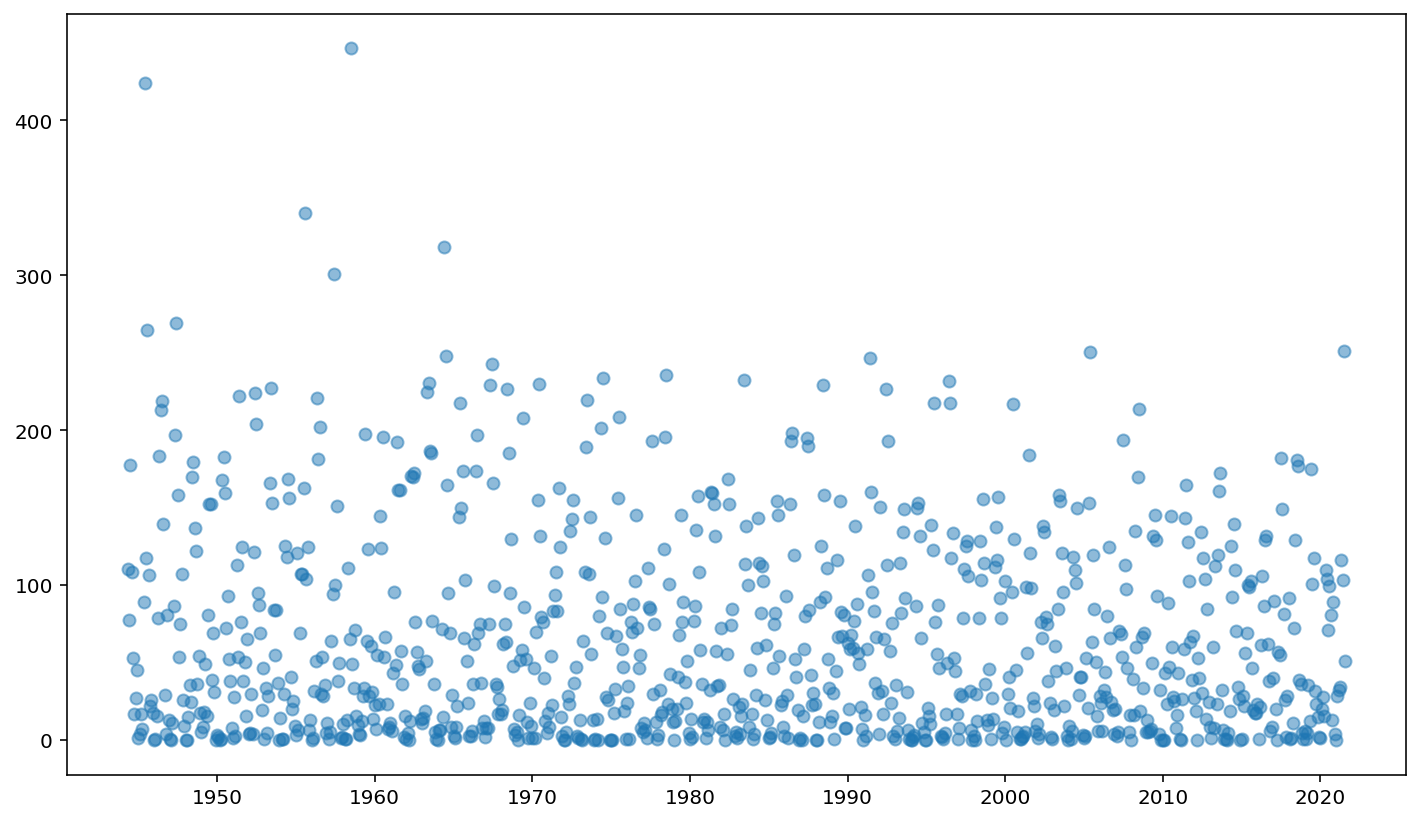

In [10]:
import matplotlib.pyplot as plt
import matplotlib as m 
import numpy as np

months= raindata('IDCJAC0001_009021_Data1.csv')[0]
print(months)
rain= raindata('IDCJAC0001_009021_Data1.csv')[1]
flags= raindata('IDCJAC0001_009021_Data1.csv')[2]




plt.scatter(months,rain,alpha=0.5)




### Comparing with averages

* Plot the data against a line showing the average rainfall (for the whole period) received at the weather station.

Can you see any trends?

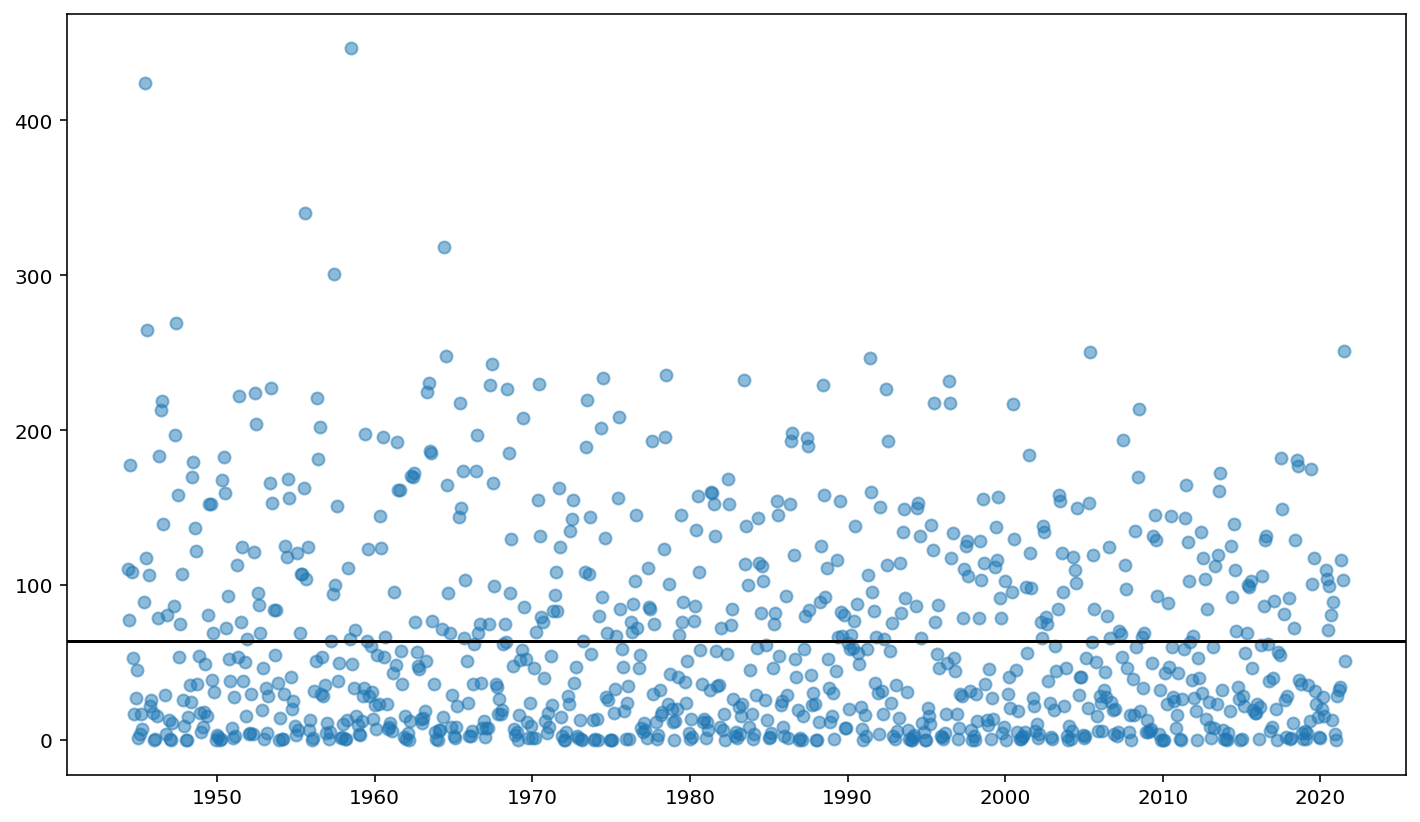

In [11]:
average= sum(rain)/len(rain)
plt.scatter(months,rain,alpha=0.5)
plt.axhline(y=average, color='black') #plots a horizontal line of average rainfall

* Create a boolean mask (over the months) that can be used to extract the data between 1950 inclusive and 1960 exclusive.

'Inclusive' means it includes 1950 (the interval is _closed_ on the left), 'exclusive' means it excludes 1960 (the interval is _open_ on the right).

You should use `datetime64` objects to set the boundaries.

* Use your mask to plot the rainfall for the 1950s, against the average for the 1950s.

You should see a regular pattern showing the seasonal cycles.


Your boss says "I've changed my mind, I want to see the data from 1950 to 1951".

* Change your mask to meet the new spec and replot.

You shouldn't need to change anything except the mask - the plotting logic stays the same. Even though we haven't written a function (yet), this shows the power and elegance of reusable programming elements!

- Plot the last 5 years (September 2016 to August 2021) to see how this year compares with recent years.

### Decadal Averages

We're going to plot averages for a number of decades, so let's go ahead and write a function.

* Write a function `get_averages(months, rain, first, last)` that:
   * takes the `months` and `rain` arrays and two dates (months), `first` and `last`
   * returns a pair `(selected_months, avs)` where
     * `selected_months` are those months that lie between first (inclusive) and last (exclusive)
     * `avs` is an array of values the same size as `selected_months`, which are all the same and are equal to the average rainfall over that period

As always, you should check your code on some values to satisfy yourself that it works.

In [12]:
def get_averages(months,rain,first,last):

	first= np.datetime64(first+'-'+'01') #concetenates the year to first mont of year
	last=np.datetime64(last+'-'+'01') #concetenates the year to first month of year which is to be excluded

	selected=[count for count,val in enumerate(months) if val>=first and val< last] #records indexes of the selected months
	selected_months= [val for count,val in enumerate(months) if val>=first and val< last]#records the selected months
	selected_rain=[rain[val] for val in selected] #records the rainfall of selected months corressponding their indexes

	average= sum(selected_rain)/len(selected_rain)
	avs=np.full([len(selected_rain)],average,dtype= float) #creates an array of values the same size as `selected_months`, which are all the same and are equal to the average rainfall over that period

	return selected_months,avs

#get_averages(raindata('IDCJAC0001_009021_Data1.csv')[0],raindata('IDCJAC0001_009021_Data1.csv')[1],'1950','1960')

* Generate your plot again, but this time use the above method to get the average between 1950 and 1960 and plot that as a line on the graph.

Increase the default width of the average line so its easier to see. Your plot should now look like this:

<div>
<img src="airport50-60.png" width="700">
</div>


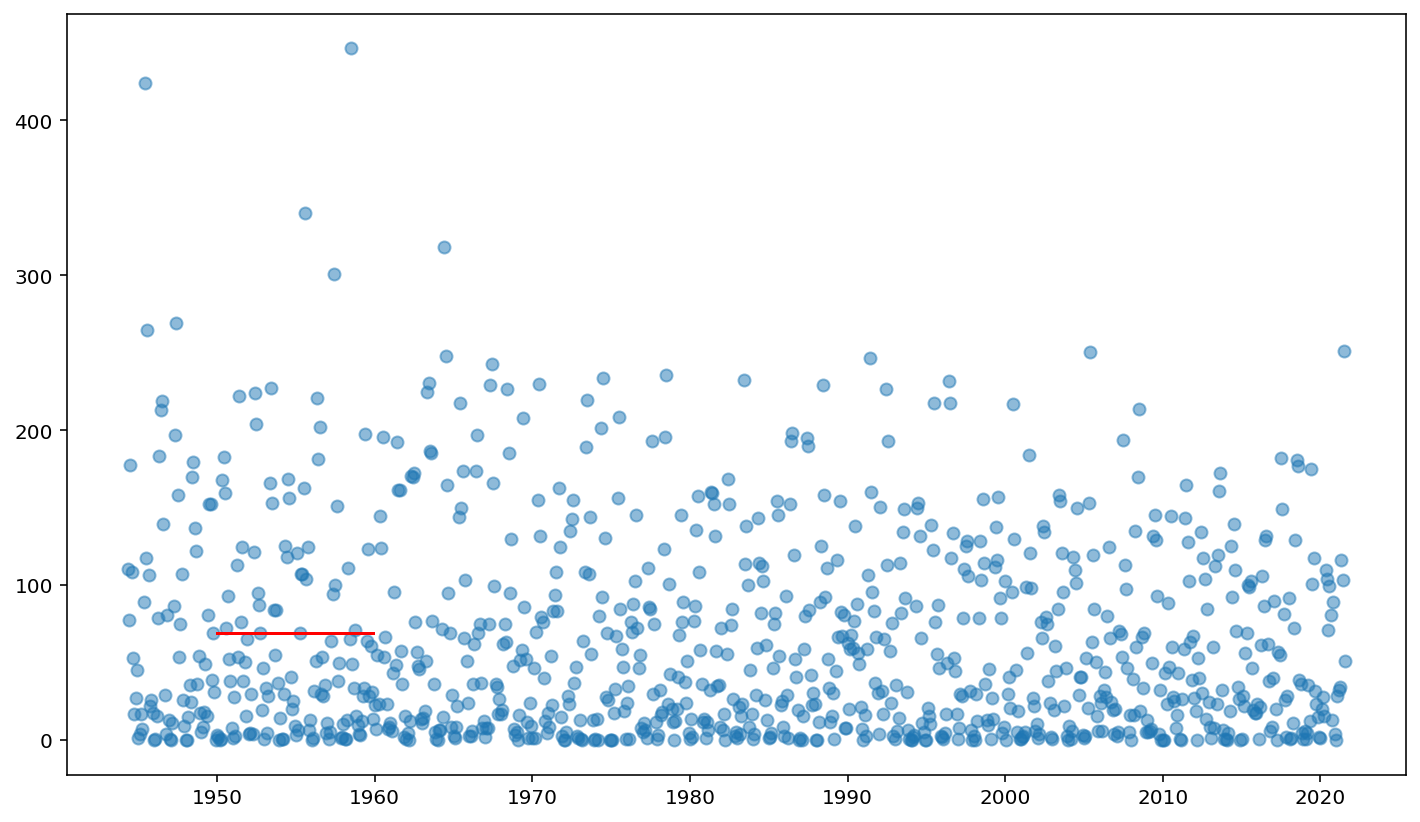

In [13]:
plt.scatter(months,rain,alpha=0.5)
plt.plot(get_averages(raindata('IDCJAC0001_009021_Data1.csv')[0],raindata('IDCJAC0001_009021_Data1.csv')[1],'1950','1960')[0],get_averages(raindata('IDCJAC0001_009021_Data1.csv')[0],raindata('IDCJAC0001_009021_Data1.csv')[1],'1950','1960')[1],color='r')

#### Setting up the iteration

* Use `arange` (one line) to generate an array containing all the decade start dates from 1940 to 2020.

Your array might look like this:

```array(['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'], dtype='datetime64[Y]')```

In [14]:
array=np.arange('1940','2021','10',dtype='datetime64[Y]')
print(array)

['1940' '1950' '1960' '1970' '1980' '1990' '2000' '2010' '2020']


* Using this array as an iterable, successively call `get_averages` to get the x and y values for each decade, successively plot each decade's average on your scatter plot.

Can you see any trend yet?

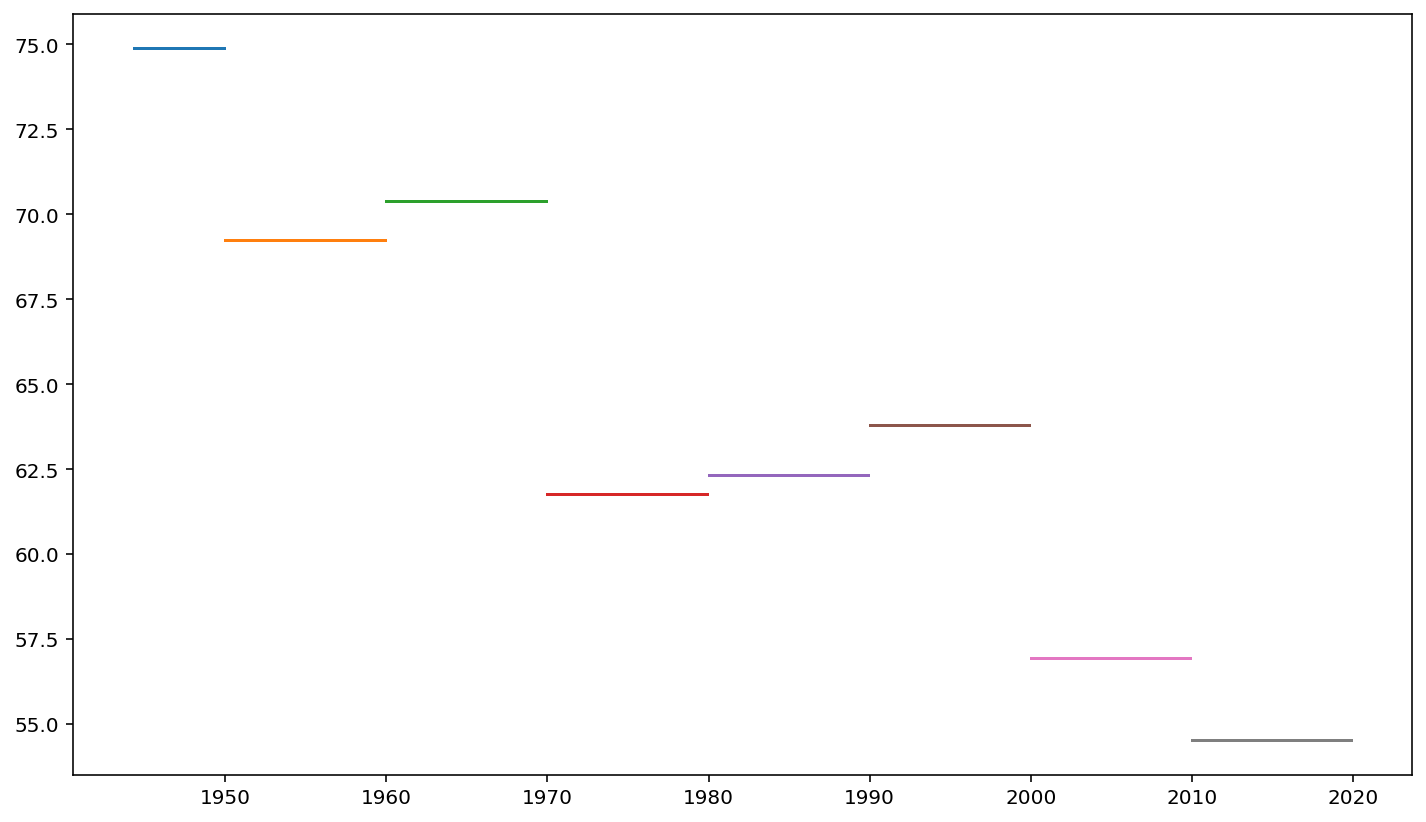

In [15]:

for count, val in enumerate(array):
	if count> 0:
		last=str(val)
		first=str(array[count-1])
		pl=get_averages(raindata('IDCJAC0001_009021_Data1.csv')[0],raindata('IDCJAC0001_009021_Data1.csv')[1],first,last)
		plt.plot(pl[0],pl[1])


* To get a better scale, plot just the decadal averages on their own (without the scatter plot).

Can you see a general trend?

#### Accumulating the decadal means [2 lab marks]

Write a function `all_decades (months, rain)` that returns two arrays, one of x-values and one of y-values, that can be used to plot a single (stepwise) line of all the decadal averages as follows:
    
```
(mean_xs, mean_ys) = all_decades(months, rain)
plt.plot(mean_xs, mean_ys)
plt.show()
```

Here `mean_xs` should be dates (datetime64) and `mean_ys` should be average rainfall in mms (float).

Note that it should work with a list of months and rain that is different to those in the airport data. Therefore the first and last decades must be determined from the values in `months`.

As usual you may break it down into more than one function if you wish.

In [66]:
def all_decades(months,rain):
	means_xs=[]
	means_ys=[]

	array=np.arange('1940','2021','10',dtype='datetime64[Y]')
	for count, val in enumerate(array):
		if count> 0:
			last=str(val)
			first=str(array[count-1])
			means=get_averages(months,rain,first,last)
			#means_xs.append(date for c,date in enumerate(means[0]))
			#means_ys.append(val for c,val in enumerate(means[1]))
			#plt.plot(means_xs,means_ys)
			for j in means[0]:
				means_xs.append(j)
			for i in means[1]:
				means_ys.append(i)
	return means_xs, means_ys
			#return means[0],means[1]


all_decades(raindata('IDCJAC0001_009021_Data1.csv')[0],raindata('IDCJAC0001_009021_Data1.csv')[1])

([numpy.datetime64('1944-05'),
  numpy.datetime64('1944-06'),
  numpy.datetime64('1944-07'),
  numpy.datetime64('1944-08'),
  numpy.datetime64('1944-09'),
  numpy.datetime64('1944-10'),
  numpy.datetime64('1944-11'),
  numpy.datetime64('1944-12'),
  numpy.datetime64('1945-01'),
  numpy.datetime64('1945-02'),
  numpy.datetime64('1945-03'),
  numpy.datetime64('1945-04'),
  numpy.datetime64('1945-05'),
  numpy.datetime64('1945-06'),
  numpy.datetime64('1945-07'),
  numpy.datetime64('1945-08'),
  numpy.datetime64('1945-09'),
  numpy.datetime64('1945-10'),
  numpy.datetime64('1945-11'),
  numpy.datetime64('1945-12'),
  numpy.datetime64('1946-01'),
  numpy.datetime64('1946-02'),
  numpy.datetime64('1946-03'),
  numpy.datetime64('1946-04'),
  numpy.datetime64('1946-05'),
  numpy.datetime64('1946-06'),
  numpy.datetime64('1946-07'),
  numpy.datetime64('1946-08'),
  numpy.datetime64('1946-09'),
  numpy.datetime64('1946-10'),
  numpy.datetime64('1946-11'),
  numpy.datetime64('1946-12'),
  numpy.

In [72]:
def all_decades (months, rain):
	means_xs=[]                                                #list for all months of the stated decade
	means_ys=[]                                                #list for all decadal rainfall averages coressponding to the months of the particular decades

	array=np.arange('1940','2021','10',dtype='datetime64[Y]')  #creates an array with years with decadal intervals
	for count, val in enumerate(array):                        # iterates the array to start with index 1
		if count> 0:
			last=str(val)                                      #value(at the index)==> the last year of the decade 
			first=str(array[count-1])                          #value(at the previous index)==> the first year of the decade 
			means=get_averages(months,rain,first,last)         

			for j in means[0]:                                 #appends all values of the year-months values of the means (list of lists) to a separate list- means_xs
				means_xs.append(j)
			for i in means[1]:
				means_ys.append(i)                             #appends all values the rainfall values of the means (list of lists) to a separate list- means_xs
	return means_xs, means_ys

In [73]:
from nose.tools import assert_equal, assert_almost_equal, assert_true
AIRPORT_DATA = "IDCJAC0001_009021_Data1.csv"
(months, rain, flags) = raindata(AIRPORT_DATA)
(mean_xs, mean_ys) = all_decades(months, rain)
assert_equal(mean_xs[100], np.datetime64('1952-09'))
assert_almost_equal(mean_ys[100], 69.24833333333332)
print("So far so good, additional tests will be applied.")


So far so good, additional tests will be applied.


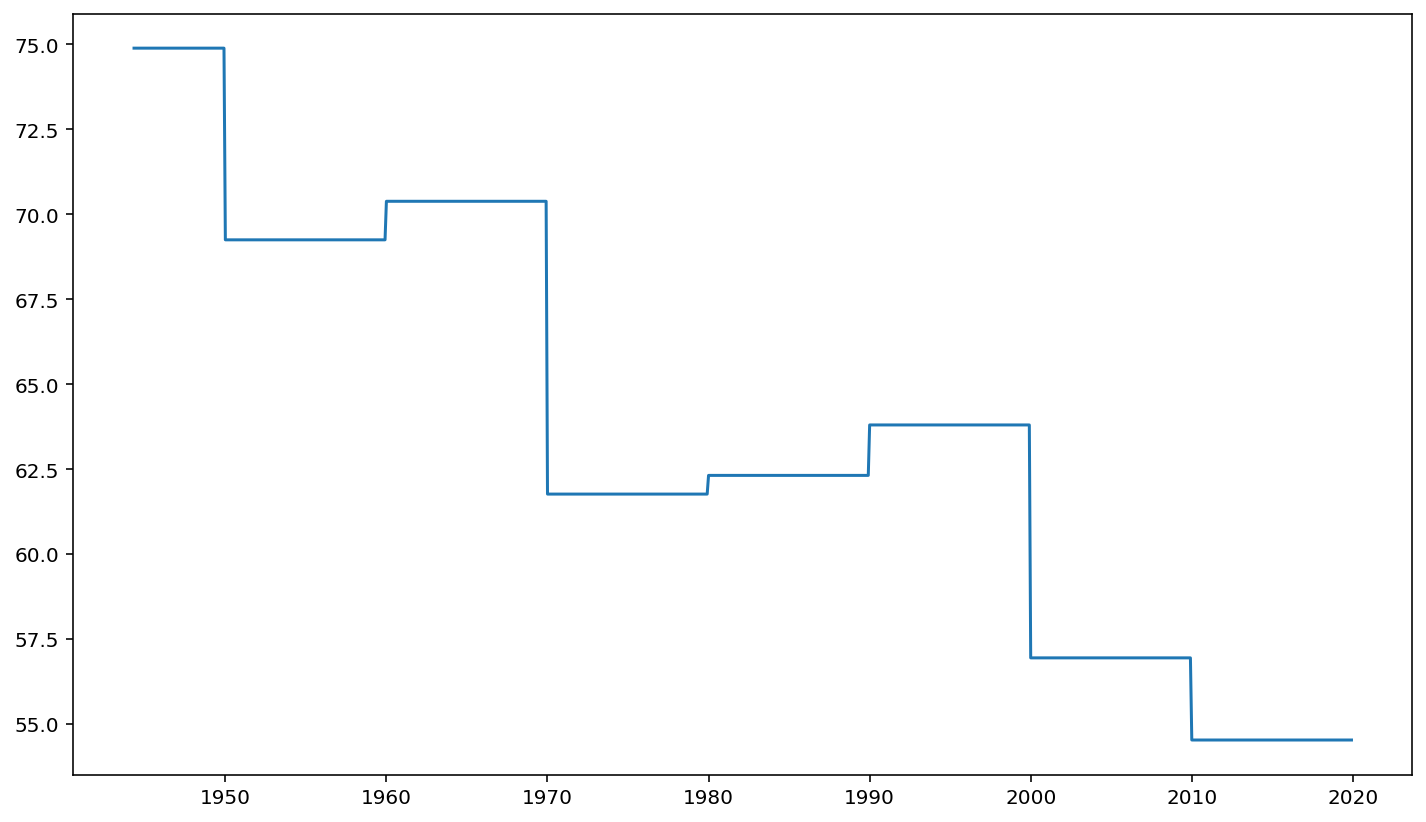

In [74]:
(mean_xs, mean_ys) = all_decades(months, rain)
plt.plot(mean_xs, mean_ys)
plt.show()

In [0]:
## Marking use only

* Plot the average rainfall line.

By now you should see a pretty clear trend!

### Flags

So far we have not taken into account the flags that indicate the data that has completed checking.

* Create a new plot of the decadal means so that it plots a green line where all data that has fully verified (flag 'Y'), and an amber (orange) line where data requires further verification (flag 'N'). Include a legend that informs the reader of what the colours mean.

### Midland weather station data

We saw from our initial inspection that the Midland data has missing portions.

* Plot a line of decadal averages for the Midland data. This time use green for verified data, orange for unverified data, and red for any periods containing missing data.



## Putting it all together

* Finally, plot the Midland and Perth Airport decadal lines on the same plot, using the 'traffic light' (red, orange, green) colour scheme, along with a legend.

What observations can you make?

&copy; Cara MacNish, UWA